In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from math import e
data=pd.read_csv("A2Q1.csv",header=None)
data=np.array(data)

In [5]:
K=4
N,D= data.shape
number_of_iterations =20
number_of_random_intialisations=100
loglikelihood=np.zeros(number_of_iterations)
for j in range(number_of_random_intialisations) :
    #print("j ",j)
    PI =np.ones(K)/K
    mean=np.random.rand(K,D)
    cov=np.array([np.identity(D) for _ in range(K)])

    for x in range(number_of_iterations) :
        
        #print("x ",x)    
        lamda = np.ones((N,K))
        lamdatemp = np.ones((N,K))
#step 1 (E step) 
      
        for k in range(K):
            temp=(data-mean[k])@np.linalg.inv(cov[k])@((data-mean[k]).T)
            a=((2*math.pi)**(D/2)*(np.linalg.det(cov[k]))**0.5)
            for i in range(N) :
                lamda[i,k]=PI[k]*math.exp(-0.5*temp[i,i])/a
                lamdatemp[i,k]=lamda[i,k]
        lamda/=np.sum(lamda,axis=1,keepdims=True)

        lamdatemp=np.sum(lamdatemp,axis=1)
#step2 (M step)
        for k in range(K):
                Nk = np.sum(lamda[:, k])
                mean[k] = np.sum(lamda[:, k, np.newaxis] * data, axis=0) / Nk
                cov[k] = np.dot((lamda[:, k, np.newaxis] * (data - mean[k])).T, (data - mean[k])) / Nk
                cov[k]=cov[k]+10**(-6)*np.eye(D)
                PI[k] = Nk / N
        for i in range(N) :

         loglikelihood[x]+=np.log(lamdatemp[i])
          


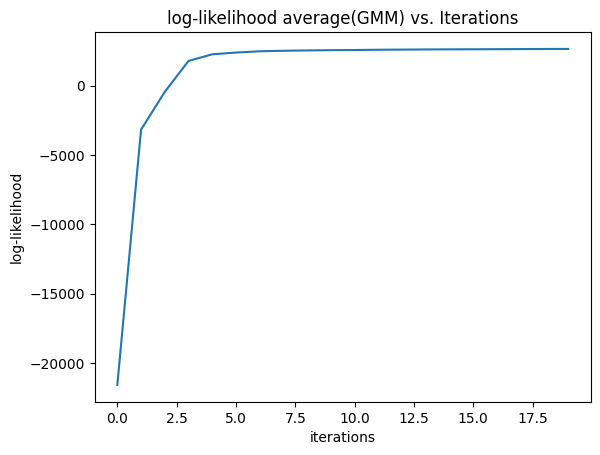

In [6]:
plt.plot(range(number_of_iterations), loglikelihood/number_of_random_intialisations)
plt.xlabel("iterations")
plt.ylabel("log-likelihood")
plt.title("log-likelihood average(GMM) vs. Iterations")
plt.show()